In [1]:
from PIL import Image
from skimage.io import imread, imshow, show
from scipy import ndimage, misc, signal, stats
from skimage import data, img_as_float
from skimage.color import rgb2gray, rgba2rgb
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft as fp
import timeit
import matplotlib.pyplot as plt

In [2]:
def plot_image(image, title='', sz=20, ax=False):
    plt.title(title, size=sz), plt.imshow(image)
    plt.axis(ax)

def calculate_2dft(input):
    ft = fp.ifftshift(input)
    ft = fp.fft2(ft)
    return fp.fftshift(ft)

def calculate_2dift(input):
    ift = fp.ifftshift(input)
    ift = fp.ifft2(ift)
    return fp.fftshift(ift).real

def readAsGray(path: str) -> np.ndarray:
    _im = imread(path)
    if len(_im.shape) == 2:
        return _im
    _im = rgba2rgb(_im) if _im.shape[2] > 3 else _im
    _im = rgb2gray(_im)
    return _im

def plot_hist(r, g, b, title='', sz=20):
    r, g, b = img_as_ubyte(r), img_as_ubyte(g), img_as_ubyte(b)
    pylab.hist(np.array(r).ravel(), bins=256, range=(0, 256), color='r', alpha=0.5)
    pylab.hist(np.array(g).ravel(), bins=256, range=(0, 256), color='g', alpha=0.5)
    pylab.hist(np.array(b).ravel(), bins=256, range=(0, 256), color='b', alpha=0.5)
    pylab.xlabel('pixel value', size=sz), pylab.ylabel('frequency', size=sz)
    pylab.title(title, size=sz)

def splitrgb(_im):
    return _im[...,0], _im[...,1], _im[...,2]

def mergergb(r,g,b):
    rgb = np.zeros((r.shape[0], r.shape[1], 3), dtype=np.uint8)
    rgb[...,0] = r
    rgb[...,1] = g
    rgb[...,2] = b
    return rgb

# ĐỀ SỐ 2

## BÀI 1

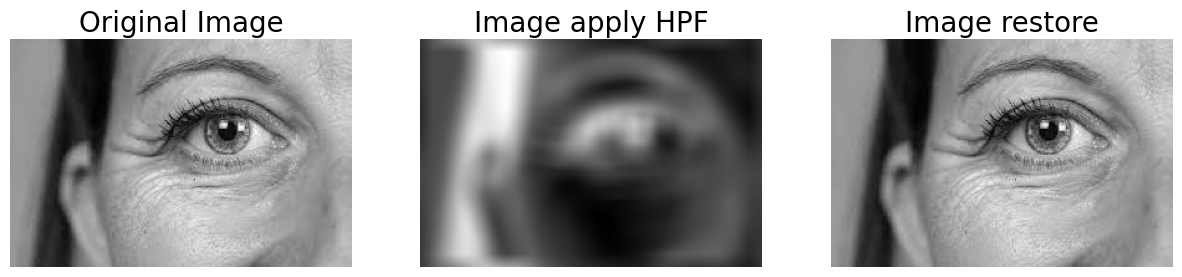

In [3]:
im = readAsGray("../images/eye.jpg")

freq = calculate_2dft(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
l = 10
hpf = np.ones(im.shape)
hpf[half_w-l:half_w+l+1,half_h-l:half_h+l+1] = 0
kernel = calculate_2dift(hpf)
epsilon = 10**-8
ikernel = 1 / (epsilon + kernel)

freq1 = freq * kernel
freq2 = freq1 * ikernel

im1 = np.clip(calculate_2dift(freq1), 0, 255)
im2 = np.clip(calculate_2dift(freq2), 0, 255)

plt.figure(figsize=(15,5)), plt.gray()
plt.subplot(131), plot_image(im, "Original Image")
plt.subplot(132), plot_image(im1, "Image apply HPF")
plt.subplot(133), plot_image(im2, "Image restore")
plt.show()



## BÀI 2

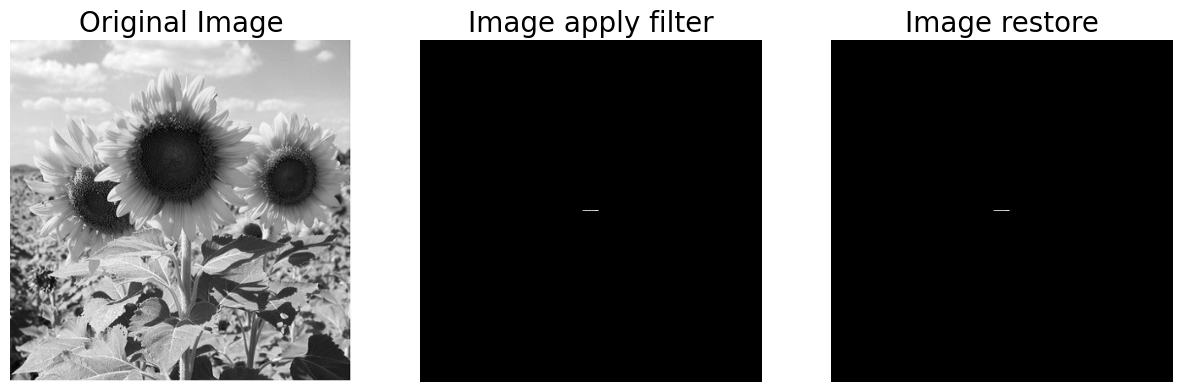

In [15]:
im = readAsGray("../images/sunflower.jpg")
size = (im.shape[0] - 19) / 2
freq = calculate_2dft(im)
kernel = np.zeros((19,19))
kernel[9,:] = 1
kernel = kernel * (1/19)
kernel = np.pad(kernel, ((int(size), int(np.ceil(size))), (int(size), int(np.ceil(size)))) , "constant", constant_values=((0,0),(0,0)))
# print(kernel[9,:])
epsilon = 10**-8
ikernel = 1 / (epsilon + kernel)

im1 = im * kernel
im2 = im1 * ikernel

# im1 = signal.fftconvolve(im, kernel, mode='same')
# im2 = signal.fftconvolve(im1, ikernel, mode='same')

plt.figure(figsize=(15,5)), plt.gray()
plt.subplot(131), plot_image(im, "Original Image")
plt.subplot(132), plot_image(im1, "Image apply filter")
plt.subplot(133), plot_image(im2, "Image restore")
plt.show()


## BAI 3

In [5]:
d0s = [5,10,15,20,25]
ns = [1,2,3,4,5]

im = readAsGray("../images/rubic.jpg")
w,h = im.shape
freq = calculate_2dft(im)
plt.figure(figsize=(30,5))
i = 1

for d0,n in zip(d0s,ns):
    for u in range(w):
        for v in range(h):
            d = np.sqrt((u-w/2)**2 + (v-h/2)**2)


<Figure size 3000x500 with 0 Axes>